In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle
from pydrake.all import MathematicalProgram, eq, ge, le, QuadraticConstraint
from pydrake.all import MosekSolver, GetAvailableSolvers, GetProgramType

0 0.5707963267948966
0.5707963267948966 2.5707963267948966
2.5707963267948966 3.7123889803846892
3.7123889803846892 5.712388980384689
5.712388980384689 6.283185307179586


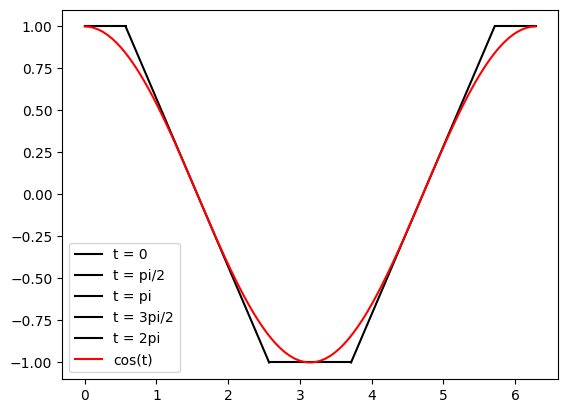

In [2]:
#plot cosine from 0 to 2pi
t = np.linspace(0, 2*np.pi, 100)
cost = np.cos(t)

#first segment
slope_l0 = -np.sin(0)
b_l0 = np.cos(0) - slope_l0*0

#second segment
slope_l1 = -np.sin(np.pi/2)
b_l1 = np.cos(np.pi/2) - slope_l1*np.pi/2

#third segment
slope_l2 = -np.sin(np.pi)
b_l2 = np.cos(np.pi) - slope_l2*np.pi

#fourth segment
slope_l3 = -np.sin(3*np.pi/2)
b_l3 = np.cos(3*np.pi/2) - slope_l3*3*np.pi/2

#fifth segment
slope_l4 = -np.sin(2*np.pi)
b_l4 = np.cos(2*np.pi) - slope_l4*2*np.pi

# find line intersection
def line_intersect(slope1, b1, slope2, b2):
    x = (b2 - b1) / (slope1 - slope2)
    return x

intersect01 = line_intersect(slope_l0, b_l0, slope_l1, b_l1)
intersect12 = line_intersect(slope_l1, b_l1, slope_l2, b_l2)
intersect23 = line_intersect(slope_l2, b_l2, slope_l3, b_l3)
intersect34 = line_intersect(slope_l3, b_l3, slope_l4, b_l4)
t0s = np.linspace(0,intersect01,100)
t1s = np.linspace(intersect01,intersect12,100)
t2s = np.linspace(intersect12,intersect23,100)
t3s = np.linspace(intersect23,intersect34,100)
t4s = np.linspace(intersect34,2*np.pi,100)

l0 = slope_l0*t0s + b_l0
l1 = slope_l1*t1s + b_l1
l2 = slope_l2*t2s + b_l2
l3 = slope_l3*t3s + b_l3
l4 = slope_l4*t4s + b_l4

print(0, intersect01)
print(intersect01, intersect12)
print(intersect12, intersect23)
print(intersect23, intersect34)
print(intersect34, 2*np.pi)

plt.plot(t0s, l0, color='k',label='t = 0')
plt.plot(t1s, l1, color='k',label='t = pi/2')
plt.plot(t2s, l2, color='k',label='t = pi')
plt.plot(t3s, l3, color='k',label='t = 3pi/2')
plt.plot(t4s, l4, color='k',label='t = 2pi')

plt.plot(t, cost, color='r',label='cos(t)')


plt.legend()


In [3]:
def line_intersect(slope1, b1, slope2, b2):
    x = (b2 - b1) / (slope1 - slope2)
    return x
def give_cos_boundaries():
    #first segment
    slope_l0 = -np.sin(0)
    b_l0 = np.cos(0) - slope_l0*0

    #second segment
    slope_l1 = -np.sin(np.pi/2)
    b_l1 = np.cos(np.pi/2) - slope_l1*np.pi/2

    #third segment
    slope_l2 = -np.sin(np.pi)
    b_l2 = np.cos(np.pi) - slope_l2*np.pi

    #fourth segment
    slope_l3 = -np.sin(3*np.pi/2)
    b_l3 = np.cos(3*np.pi/2) - slope_l3*3*np.pi/2

    #fifth segment
    slope_l4 = -np.sin(2*np.pi)
    b_l4 = np.cos(2*np.pi) - slope_l4*2*np.pi

    # find line intersection


    intersect01 = line_intersect(slope_l0, b_l0, slope_l1, b_l1)
    intersect12 = line_intersect(slope_l1, b_l1, slope_l2, b_l2)
    intersect23 = line_intersect(slope_l2, b_l2, slope_l3, b_l3)
    intersect34 = line_intersect(slope_l3, b_l3, slope_l4, b_l4)
    
    cos_ranges =  np.array([[0, intersect01], 
                            [intersect01, intersect12], 
                            [intersect12, intersect23], 
                            [intersect23, intersect34], 
                            [intersect34, 2*np.pi]])
    cos_slopes = np.array([slope_l0, slope_l1, slope_l2, slope_l3, slope_l4])
    cos_intercepts = np.array([b_l0, b_l1, b_l2, b_l3, b_l4])
    
    return cos_ranges, cos_slopes, cos_intercepts

def give_sin_boundaries():
    # first segment
    slope_l0 = np.cos(0)
    b_l0 = np.sin(0) - slope_l0*0
    
    # second segment
    slope_l1 = np.cos(np.pi/2)
    b_l1 = np.sin(np.pi/2) - slope_l1*np.pi/2
    
    # third segment
    slope_l2 = np.cos(np.pi)
    b_l2 = np.sin(np.pi) - slope_l2*np.pi
    
    # fourth segment
    slope_l3 = np.cos(3*np.pi/2)
    b_l3 = np.sin(3*np.pi/2) - slope_l3*3*np.pi/2
    
    # fifth segment
    slope_l4 = np.cos(2*np.pi)
    b_l4 = np.sin(2*np.pi) - slope_l4*2*np.pi
    
    # find line intersection
    intersect01 = line_intersect(slope_l0, b_l0, slope_l1, b_l1)
    intersect12 = line_intersect(slope_l1, b_l1, slope_l2, b_l2)
    intersect23 = line_intersect(slope_l2, b_l2, slope_l3, b_l3)
    intersect34 = line_intersect(slope_l3, b_l3, slope_l4, b_l4)
    
    sin_ranges =  np.array([[0, intersect01],
                            [intersect01, intersect12],
                            [intersect12, intersect23],
                            [intersect23, intersect34],
                            [intersect34, 2*np.pi]])
    sin_slopes = np.array([slope_l0, slope_l1, slope_l2, slope_l3, slope_l4])
    sin_intercepts = np.array([b_l0, b_l1, b_l2, b_l3, b_l4])
    
    return sin_ranges, sin_slopes, sin_intercepts

In [4]:
def footstep_planner(initial_left, initial_right, goal_pos, steps=10, step_span=0.1, reachability = 0.1, angle_step_span = 0.2):
    
    # NOTE: this will be an MISOCP
    prog = MathematicalProgram()
    
    p_left = np.array([0,  0.2, 0])
    p_right = np.array([0, 0.2, 0])
    # Variables for Feet
    left_foot_states = prog.NewContinuousVariables(rows=steps+1, cols=3, name="left_foot")
    right_foot_states = prog.NewContinuousVariables(rows=steps+1, cols=3, name="right_foot")
    
    # Integer Variables for cos/sin of footstep angle
    C = prog.NewBinaryVariables(rows=steps, cols=5, name="C")
    S = prog.NewBinaryVariables(rows=steps, cols=5, name="S")
    
    # Variables for cos/sin
    cos = prog.NewContinuousVariables(rows=steps, name="cos")
    sin = prog.NewContinuousVariables(rows=steps, name="sin")
    
    # initial conditions
    prog.AddLinearConstraint(eq(left_foot_states[0,:], initial_left))
    prog.AddLinearConstraint(eq(right_foot_states[0,:], initial_right))
    
    # step span
    # also left step every even
    # right step every odd
    for i in range(1, steps+1):
        moving_foot = left_foot_states if i % 2 == 0 else right_foot_states
        still_foot = right_foot_states if i % 2 == 0 else left_foot_states
        #step span constraints
        prog.AddLinearConstraint(moving_foot[i,0] <= moving_foot[i-1,0] + step_span)
        prog.AddLinearConstraint(moving_foot[i,1] <= moving_foot[i-1,1] + step_span)
        prog.AddLinearConstraint(moving_foot[i,2] <= moving_foot[i-1,2] + angle_step_span)
        
        prog.AddLinearConstraint(moving_foot[i,0] >= moving_foot[i-1,0] - step_span)
        prog.AddLinearConstraint(moving_foot[i,1] >= moving_foot[i-1,1] - step_span)
        prog.AddLinearConstraint(moving_foot[i,1] >= moving_foot[i-1,1] - angle_step_span)
        
        # still foot constraints
        prog.AddLinearConstraint(eq(still_foot[i,:], still_foot[i-1,:]))
        
    cos_range, cos_slope, cos_intercept = give_cos_boundaries()
    sin_range, sin_slope, sin_intercept = give_sin_boundaries()
    
    # cos/sin constraints    
    # big-M constraints to determine cos/sin based on angle
    # big-M constraints to bound angle
    M_angle = 1000
    M_assign = 1000
    for i in range(1, steps+1):
        foot = left_foot_states if i % 2 == 0 else right_foot_states
        for j in range(5):
            #bound angle 
            prog.AddLinearConstraint(foot[i,2] <= cos_range[j,1] + M_angle*(1-C[i-1,j]))
            prog.AddLinearConstraint(foot[i,2] >= cos_range[j,0] - M_angle*(1-C[i-1,j]))
            prog.AddLinearConstraint(foot[i,2] <= sin_range[j,1] + M_angle*(1-S[i-1,j]))
            prog.AddLinearConstraint(foot[i,2] >= sin_range[j,0] - M_angle*(1-S[i-1,j]))
            # assign value of cos/sin
            prog.AddLinearConstraint(cos[i-1] <= cos_slope[j]*foot[i,2] + cos_intercept[j] + M_assign*(1-C[i-1,j]))
            prog.AddLinearConstraint(cos[i-1] >= cos_slope[j]*foot[i,2] + cos_intercept[j] - M_assign*(1-C[i-1,j]))
            
            prog.AddLinearConstraint(sin[i-1] <= sin_slope[j]*foot[i,2] + sin_intercept[j] + M_assign*(1-S[i-1,j]))
            prog.AddLinearConstraint(sin[i-1] >= sin_slope[j]*foot[i,2] + sin_intercept[j] - M_assign*(1-S[i-1,j]))
    
    # ensure only pick one cos/sin range per step
    prog.AddLinearConstraint(eq(C.sum(axis=1), np.ones(steps)))
    prog.AddLinearConstraint(eq(S.sum(axis=1), np.ones(steps)))
    
    
    # reachability constraints as SOC
    # (x_j - x_j-1 - R*p)^T Q (x_j - x_j-1 - R*p) <= d
    Q = np.eye(2)
    Qhalf = np.sqrt(Q)
    for i in range(1, steps+1):
        foot = left_foot_states if i % 2 == 0 else right_foot_states
        other_foot = right_foot_states if i % 2 == 0 else left_foot_states
        # p = p_left if i % 2 == 0 else p_right
        # p_other = p_right if i % 2 == 0 else p_left
        p = p_left
        p_other = p_right
        
        R = np.array([[cos[i-1], -sin[i-1]], [sin[i-1], cos[i-1]]])
        x = foot[i,:2] - (foot[i-1,:2] + R@p[:2])
        z = np.concatenate([ np.array([reachability + 1]), 2*Qhalf @ x, np.array([reachability - 1])])
        
        # add reachability constraint for other foot
        x_other = foot[i,:2] - (other_foot[i-1,:2] + R@p_other[:2])
        z_other = np.concatenate([ np.array([reachability + 1]), 2*Qhalf @ x_other, np.array([reachability - 1])])
        
        prog.AddLorentzConeConstraint(z)
        prog.AddLorentzConeConstraint(z_other)
    
    # goal position quadratic cost as SOC
    Q = np.eye(3)
    Qhalf = np.sqrt(Q)
    slack_left = prog.NewContinuousVariables(steps+1, name="goal")
    slack_right = prog.NewContinuousVariables(steps+1, name="goal")
    for i in range(steps+1):
        zleft = np.concatenate([np.array([slack_left[i] + 1]), 2*Qhalf @ (left_foot_states[i,:] - goal_pos), np.array([slack_left[i] - 1]) ])
        prog.AddLorentzConeConstraint(zleft)
        
        zright = np.concatenate([np.array([slack_right[i] + 1]), 2*Qhalf @ (right_foot_states[i,:] - goal_pos), np.array([slack_right[i] - 1]) ])
        prog.AddLorentzConeConstraint(zright)
    
    # add cost
    prog.AddLinearCost(slack_left.sum())
    prog.AddLinearCost(slack_right.sum())
    
    # solve with Mosek
    solver = MosekSolver()
    result = solver.Solve(prog)
    
    # print solver type
    # print solver available
    print(GetProgramType(prog))
    print([solver.name() for solver in GetAvailableSolvers(GetProgramType(prog))])
    
    
    if not result.is_success():
        print("Optimization failed")
    else:
        print("Optimization successful")
    
    left_foot_sol = result.GetSolution(left_foot_states)
    right_foot_sol = result.GetSolution(right_foot_states)
    
    return left_foot_sol.T, right_foot_sol.T

In [5]:
initial_left = np.array([0, -0.03, 0])
initial_right = np.array([0, 0.03, 0])

goal_pos = np.array([1, 0, 0])
n_steps = 20
step_span = 0.1
foot_reach = 0.05

left, right = footstep_planner(initial_left, initial_right, goal_pos, steps=n_steps, step_span=step_span, reachability=foot_reach)

ProgramType.kMISOCP
['Mosek']
Optimization successful


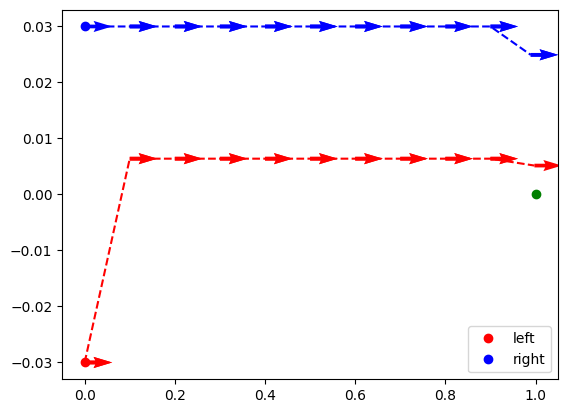

In [6]:
# plot the footstep sequence
plt.plot(initial_left[0], initial_left[1], 'ro', label='left')
plt.plot(initial_right[0], initial_right[1], 'bo', label='right')
plt.plot(left[0, :], left[1, :], 'r--'
         , right[0, :], right[1, :], 'b--')

# plot quiver
for i in range(0, n_steps+1):
    plt.quiver(left[0, i], left[1, i], np.cos(left[2, i]), np.sin(left[2, i]), color='r')
    plt.quiver(right[0, i], right[1, i], np.cos(right[2, i]), np.sin(right[2, i]), color='b')
plt.plot(goal_pos[0], goal_pos[1], 'go')
plt.legend()
plt.show()

In [146]:
print(left[:2,:3])
print(right[:2,:3])

[[ 0.00000000e+00  0.00000000e+00  1.00000002e-01]
 [-1.00000000e-01 -1.00000000e-01 -2.03284550e-05]]
[[0.00000000e+00 1.00000002e-01 1.00000002e-01]
 [1.00000000e-01 2.01739175e-05 2.01739175e-05]]
